# Ex02 : Generation using NuWro

Let's break down the provided script:

```bash
#!/bin/bash

## The output file name
OUTFILE=NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root

## The file that sets all physics parameters for the nuwro simulations
INCARD=${PWD}/MC_inputs/MINERvA_LE_numu_NUWRO_LFGRPA.params

## Flux information required for normalization in the NUISANCE step
## (this information is passed to nuwro through $INCARD)
NU_PDG=14
FLUX_FILE=/opt/nuisance/data/flux/minerva_le_flux.root
FLUX_HIST=numu_fhc

## This is nuwro's event generation application
echo "Starting nuwro..."
nuwro -i ${INCARD} -o ${OUTFILE}

## The next two steps use NUISANCE applications
echo "Starting PrepareNuWroEvents..."
PrepareNuWroEvents ${OUTFILE} -F ${FLUX_FILE},${FLUX_HIST},${NU_PDG}

echo "Creating NUISANCE flat trees"
nuisflat -f GenericVectors -i NuWro:${OUTFILE} -o ${OUTFILE/.root/_NUISFLAT.root}
```

1. **Output File Name**:
   ```bash
   OUTFILE=NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root
   ```
   This line sets the variable `OUTFILE` to the specified output file name.

2. **Physics Parameter File**:
   ```bash
   INCARD=${PWD}/MC_inputs/MINERvA_LE_numu_NUWRO_LFGRPA.params
   ```
   Here, `INCARD` is set to the location of the file that sets all physics parameters for the NUWRO simulations.

3. **Flux Information**:
   ```bash
   NU_PDG=14
   FLUX_FILE=/opt/nuisance/data/flux/minerva_le_flux.root
   FLUX_HIST=numu_fhc
   ```
   These lines set the neutrino PDG code (`NU_PDG`) and provide flux information required for normalization in the NUISANCE step (`FLUX_FILE` and `FLUX_HIST`).

4. **NUWRO Event Generation**:
   ```bash
   echo "Starting nuwro..."
   nuwro -i ${INCARD} -o ${OUTFILE}
   ```
   - This initiates NUWRO's event generation application (`nuwro`) using the input physics parameter file (`-i`) and specifying the output file (`-o`).

5. **NUISANCE Steps**:
   ```bash
   echo "Starting PrepareNuWroEvents..."
   PrepareNuWroEvents ${OUTFILE} -F ${FLUX_FILE},${FLUX_HIST},${NU_PDG}

   echo "Creating NUISANCE flat trees"
   nuisflat -f GenericVectors -i NuWro:${OUTFILE} -o ${OUTFILE/.root/_NUISFLAT.root}
   ```
   - **PrepareNuWroEvents**: This step prepares NUWRO events for further analysis using NUISANCE. It takes the output NUWRO file as input and provides flux information.
   - **nuisflat**: This command creates NUISANCE flat trees from NUWRO events. It specifies the type of flat trees to create and the input and output file names.

This script demonstrates a workflow involving NUWRO event generation followed by NUISANCE analysis steps for further processing and analysis of the generated events. We can run all that as a single line below in a bash cell provided we have the params file.

In [1]:
# BASH COMMAND
!cd MC_outputs/; nuwro -i ../MC_inputs/MINERvA_LE_numu_NUWRO_LFGRPA.params \
    -o ./NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root


  ____________________________________________________________________________
 |                                                                            |
 |                                                                            |
 |                                      `.``      `.       .-.        `       |
 |                                  `-/+os+s  ./ohmN:.    sNNNy:`   .---.+`   |
 |    |\ |     |  |  _  _           :oooyysy: +oodMMd-`  .MMMMM/-   -----s/   |
 |    | \| |_| |/\| |  (_)           `.`oyy+d`   `mMMo-   yMMMyo`   .----d.   |
 |             __        __   __        .yyyoo    :MMN:.  :MMho.    `---h:    |
 |              _) /|   /  \ (__\        :yyoh-    sMMh-`.mMho-     ---h:     |
 |             /__  | . \__/  __/         oyy+h    `mMM+-mMho-     ---h:      |
 |                                        .yyys+    -MMNmMh+-     ---h:       |
 |                                         :yyod.    sMMMh+-     ---h:        |
 |   Wrocław Neutrino Event Generator   

### Using NUISANCE for Further Analysis
Certainly, let's break down the given step:

```bash
## The next two steps use NUISANCE applications
echo "Starting PrepareNuWroEvents..."
PrepareNuWroEvents ${OUTFILE} -F ${FLUX_FILE},${FLUX_HIST},${NU_PDG}
```
   - **Command**: `PrepareNuWroEvents` is a NUISANCE application used for preparing NUWRO events for further analysis.
   - **Arguments**:
     - `${OUTFILE}`: Specifies the input NUWRO output file.
   - **Options**:
     - `-F ${FLUX_FILE},${FLUX_HIST},${NU_PDG}`: Specifies the flux information required for normalization in the NUISANCE step. `${FLUX_FILE}` and `${FLUX_HIST}` provide the flux histogram information, and `${NU_PDG}` provides the PDG code of the incoming neutrino.

This step initiates the `PrepareNuWroEvents` process, which prepares NUWRO events for subsequent analysis with NUISANCE. It ensures that the necessary configurations and formats are applied to the NUWRO output file for accurate analysis and interpretation.

In [2]:
# BASH COMMAND
!PrepareNuWroEvents MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root \
    -F /opt/nuisance/data/flux/minerva_le_flux.root,numu_fhc,14

Nuisance: Neutrino Interaction Systematics ANalyser by Comparing Experiments  -- Fit and compare.
[ NUISANCE ]: Loading DEFAULT settings from : /opt/nuisance/parameters/config.xml
[ NUISANCE ]: Finished nuisconfig.
[ NUISANCE ]: Setting VERBOSITY=4
[ NUISANCE ]: Setting ERROR=2
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutctrl.h
   requested to autoload type NeutCtrl
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutfsipart.h
   requested to autoload type NeutFsiPart
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutfsivert.h
   requested to autoload type NeutFsiVert
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutnucfsistep.h
   requested to autoload type NeutNucFsiStep
Error in cling::AutoLoadingVisitor::InsertInt

### Creating NUISANCE Flat Trees

After preparing the GENIE output file for further analysis with NUISANCE, the script proceeds to create NUISANCE flat trees. Let's understand this step:

```bash
echo "Creating NUISANCE flat trees"
nuisflat -f GenericVectors -i NuWro:${OUTFILE/.root/_NUIS.root} -o ${OUTFILE/.root/_NUISFLAT.root}
```

   - **Command**: `nuisflat` is a NUISANCE application used to create flat trees for further analysis.
   - **Options**:
     - `-f GenericVectors`: Specifies the type of flat trees to create. In this case, it indicates the use of generic vectors.
     - `-i NuWro:${OUTFILE/.root/_NUIS.root}`: Specifies the input file for creating flat trees. Here, the prepared NuWro output file is used.
     - `-o ${OUTFILE/.root/_NUISFLAT.root}`: Specifies the output file name for the created flat trees. Here, `.root` in the original filename is replaced with `_NUISFLAT.root`.

This step generates NUISANCE flat trees from the prepared NuWro output file. These flat trees are structured data formats that simplify subsequent analysis tasks by organizing data into easily accessible formats, facilitating efficient analysis with NUISANCE tools.

In [3]:
# BASH COMMAND
!nuisflat -f GenericVectors \
    -i NuWro:MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root \
    -o MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu_NUISFLAT.root

Nuisance: NUIsance Systematics ANalyser Constraints from Experiments  -- Fit and compare.
[ NUISANCE ]: Loading DEFAULT settings from : /opt/nuisance/parameters/config.xml
[ NUISANCE ]: Finished nuisconfig.
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 102] : Reading Input File = NuWro:MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu.root
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 111] : Saving flattree in format = GenericVectors
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 121] : Saving nuisflat output to MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu_NUISFLAT.root
[ NUISANCE ]: Setting VERBOSITY=4
[ NUISANCE ]: Setting ERROR=2
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutctrl.h
   requested to autoload type NeutCtrl
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutfsipart.h
   requested to autoload type NeutFsiPart
Error in cling

# PyROOT Output Processing

Now that we have created a NUISANCE flat tree we can plot different generator level quantities in a standard way. An example is given using python in the code below. The advantage of this is the analysis can be repeated for any generator by simple changing the ROOT TFile to point at another NUISANCE flat tree that has been created from the raw generator outputs.

In [4]:
import ROOT
f = ROOT.TFile("MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu_NUISFLAT.root","READ")
f.ls()

Welcome to JupyROOT 6.30/04
TFile**		MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu_NUISFLAT.root	
 TFile*		MC_outputs/NUWRO_LFGRPA_MINERvA_LE_FHC_numu_NUISFLAT.root	
  KEY: TTree	FlatTree_VARS;2	FlatTree_VARS [current cycle]
  KEY: TTree	FlatTree_VARS;1	FlatTree_VARS [backup cycle]
  KEY: TH1D	FlatTree_FLUX;1	FlatTree_FLUX
  KEY: TH1D	FlatTree_EVT;1	FlatTree_EVT


Inside each file you'll see we have a TTree, and the FLUX and Event Rate (EVT) histograms. NUISANCE needs this to properly determine either flux averaged or flux unfolded cross-sections. They are calculated at the Prepare stage but included here in case you need it.

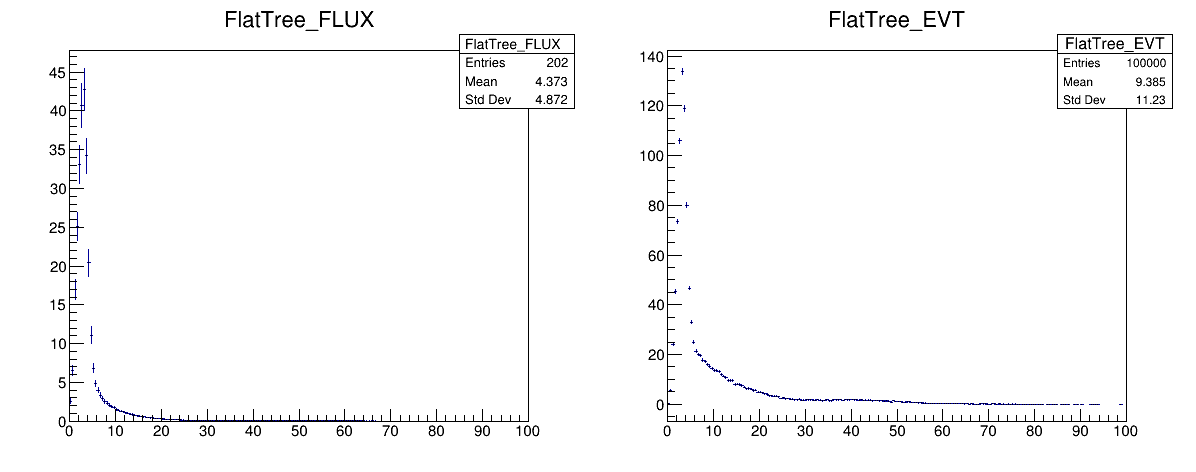

In [5]:
c1 = ROOT.TCanvas("c1","c1",1200,500)
c1.Divide(2,1)

c1.cd(1)
f.FlatTree_FLUX.Draw()

c1.cd(2)
f.FlatTree_EVT.Draw()

c1.Draw()

The most important thing in the file is the FlatTree itself. This contains a list of all particles in the event alongside a set of precalculated quantities of interest.

In [6]:
fvs = f.Get("FlatTree_VARS")
fvs.Show(0)

======> EVENT:0
 Mode            = 13
 GENIEResCode    = 9999
 cc              = 1
 PDGnu           = 14
 Enu_true        = 3.68694
 tgt             = 1000060120
 tgta            = 12
 tgtz            = 6
 PDGLep          = 13
 ELep            = 1.70748
 CosLep          = 0.937834
 Q2              = 0.794182
 q0              = 1.97946
 q3              = 2.17082
 Enu_QE          = 1.97251
 Q2_QE           = 0.419696
 W_nuc_rest      = 1.94954
 W               = 1.94954
 W_genie         = -999
 x               = 0.213804
 y               = 0.536883
 Erecoil_minerva = 1.09682
 Erecoil_charged = 1.23639
 EavAlt          = 1.14085
 Emiss           = 0.044039
 pmiss           = (TVector3*)0x55eee4a9f220
 Emiss_preFSI    = 0.0138525
 pmiss_preFSI    = (TVector3*)0x55eee419e7f0
 CosThetaAdler   = 0.0116388
 PhiAdler        = 30.7976
 dalphat         = -9999
 dpt             = -9999
 dphit           = -9999
 pnreco_C        = -9999
 nfsp            = 3
 px              = 0.036977, 
            

Some interesting ones are:
- `Mode` : NEUT Interaction code. Other generators are converted into this (+-1 CCQE, +-2 2p2h, etc).
- `flagXXX`: Different final state topoology selections.
- `fScaleFactor`: A weighting factor that can be used to convert all predictions into flux averaged total cross-sections.
- `px,py,pz,E,pdg`: List of final state particle momenta, energies, and pdgs.
- `q0,q3,Q2`: Momentum transfer information.

In the cell below as an example we draw the true neutrino energy distribution for all events in our small flat tree.

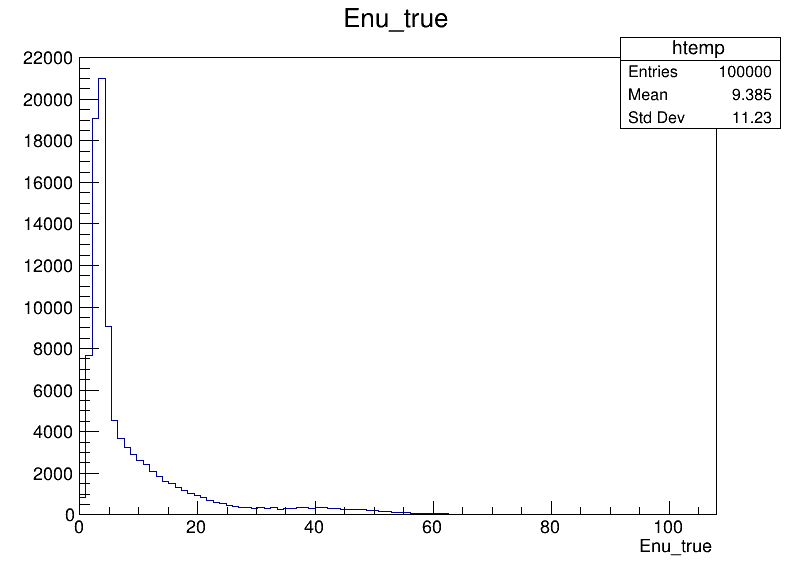

In [7]:
c2 = ROOT.TCanvas("c2","c2",800,600)
c2.cd()
fvs.Draw("Enu_true")
c2.Draw()

We can also do things like plot `q0` vs `q3` for an event using standard TTree draw commands.

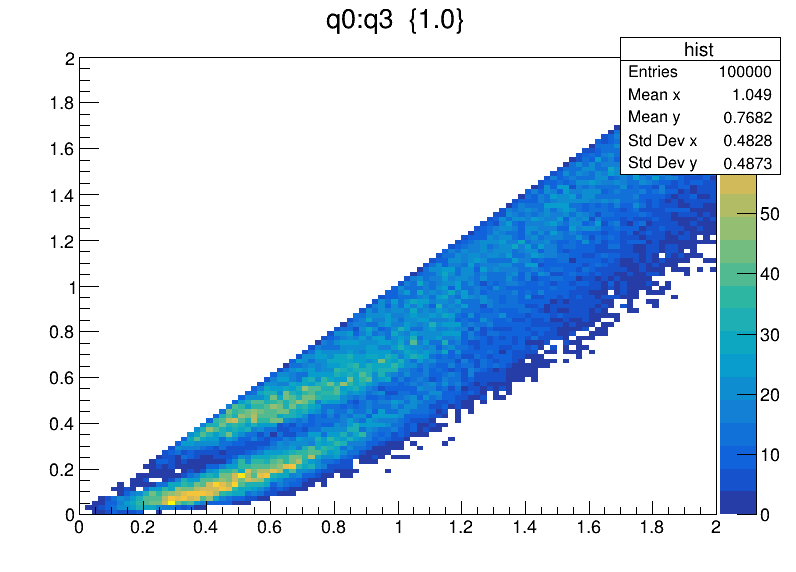

In [8]:
c3 = ROOT.TCanvas("c3","c3",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","1.0","COLZ")
c3.Draw()

Those topology flags we discussed earlier can come in handy for event selections.

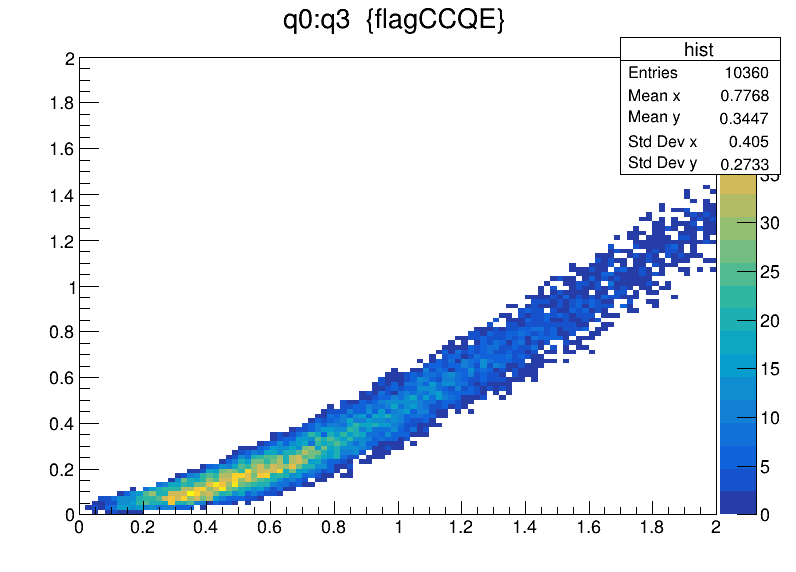

In [9]:
c4 = ROOT.TCanvas("c4","c4",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","flagCCQE","COLZ")
c4.Draw()

Or we can even write our own based on event selections. The TTree draw `Sum$()` function comes in very handy for these. The command below draws any event where at least one positive pion with an energy greater than 200 MeV is observed in the event.

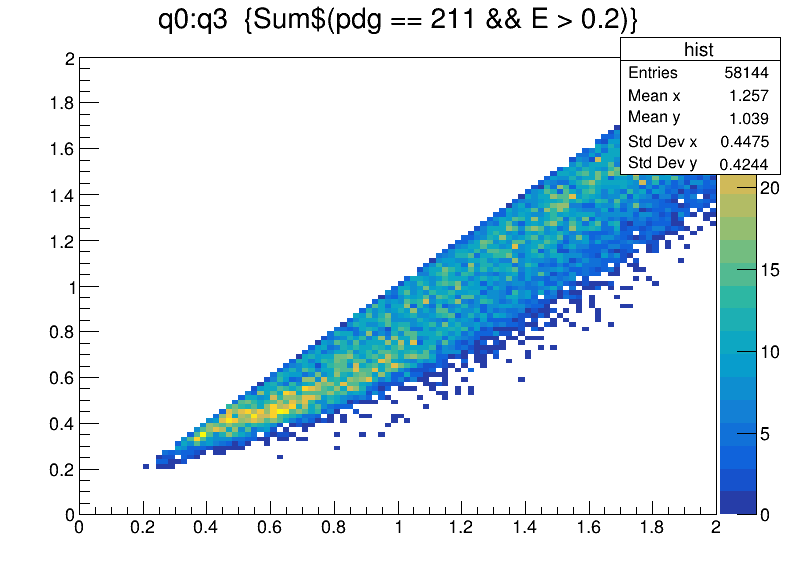

In [10]:
c5 = ROOT.TCanvas("c5","c5",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","Sum$(pdg == 211 && E > 0.2)","COLZ")
c5.Draw()

That concludes our overview of NUISANCE FlatTree features. For comparing multiple generators using flattree files please see later tutorials.